# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

### **Project Description:**                                                                                                       
The goal is to build a Face Mask Segmentation model which includes building a face detector to locate the position of a face in an image

### **Objective**                                                                                                                                                                      
In this problem, we use "Transfer Learning" of an Image Segmentation model to detect any object according to the problem in hand.Here, we are particularly interested in segmenting faces in a given image.                                               

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [23]:
#from google.colab import drive
#drive.mount('/content/drive')

**Load the dataset**

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

### Load the "images.npy" file

In [2]:
# Loading the datafile

df = np.load('images.npy', allow_pickle = True)
df.shape

(409, 2)

In [3]:
import keras
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Reshape, UpSampling2D, Concatenate
from keras import backend as K

Using TensorFlow backend.
C:\Users\nagarc1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nagarc1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nagarc1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

### Check one sample from the loaded "images.npy" file

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


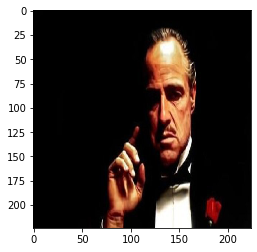

In [4]:
# Checking one sample from the loaded datafile 'images.npy'

import cv2
import matplotlib.pyplot as plt

print(df[10][1])
a = df[10][0]
a = cv2.resize(a, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(a)
plt.show()

### Set image dimensions

In [5]:
#Image Settings 

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
ALPHA = 1.0

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [6]:
# Creating features and labels

import cv2

masks = np.zeros((int(df.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(df.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(df.shape[0]):
    img = df[index][0]
    # print(img.shape)
    # img.reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in df[index][1]:
        # print(i)
        original_height = i["imageHeight"]
        original_width = i["imageWidth"]
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array

In [7]:
# Checking the shape of the new dataset

print('Shape of X_train: ', X_train.shape)
print('Shape of mask: ', masks.shape)

Shape of X_train:  (409, 224, 224, 3)
Shape of mask:  (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.95294118  0.95294118  0.95294118]
  [ 1.          1.          1.        ]
  [ 0.98431373  0.98431373  0.98431373]
  ...
  [ 0.34901965  0.26274514  0.12156868]
  [ 0.37254906  0.28627455  0.14509809]
  [ 0.3176471   0.23137259  0.09019613]]

 [[ 0.98431373  0.98431373  0.98431373]
  [ 0.96862745  0.96862745  0.96862745]
  [ 0.97647059  0.97647059  0.97647059]
  ...
  [ 0.38823533  0.30196083  0.16078436]
  [ 0.39607847  0.30980396  0.1686275 ]
  [ 0.24705887  0.16078436  0.0196079 ]]

 [[ 0.98431373  0.98431373  0.98431373]
  [ 0.96862745  0.96862745  0.96862745]
  [ 0.96862745  0.96862745  0.96862745]
  ...
  [ 0.35686278  0.27058828  0.12941182]
  [ 0.38039219  0.29411769  0.15294123]
  [ 0.39607847  0.30980396  0.1686275 ]]

 ...

 [[-0.87450981 -0.89803922 -0.87450981]
  [-0.78039217 -0.78823531 -0.79607844]
  [ 0.15294123  0.05882359  0.05882359]
  ...
  [-0.28627449 -0.30196077 -0.43529409]
  [-0.05098039 -0.08235294 -0.21568626]
  [-0.19999999 -0.26274508 -0.38039213]]

 [

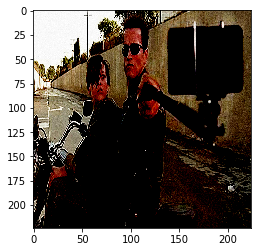

In [8]:
n = 80
print(X_train[n])
plt.imshow(X_train[n])
plt.show()

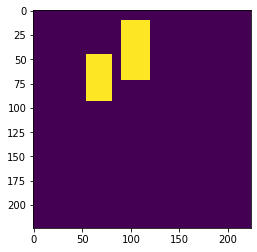

In [9]:
plt.imshow(masks[n])

plt.show()

## Create the model
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [10]:
# Create a model using the above model

def UNET_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable
    # model.summary()
  
    block_0 = model.get_layer("conv_pw_1_relu").output
    block0 = model.get_layer("conv_pw_3_relu").output
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    print(x.shape)
    
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Conv2D(4, kernel_size=1, name="coords")(x)

    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block_0])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)
    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [11]:
model = UNET_model()
print('--------Model Summary--------')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
(?, 14, 14, 1536)
(?, 28, 28, 1792)
(?, 56, 56, 132)
(?, 112, 112, 196)
(?, 224, 224, 196)
(?, 224, 224)
--------Model Summary--------
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
c

__________________________________________________________________________________________________
conv_pw_9 (Conv2D)              (None, 14, 14, 512)  262144      conv_dw_9_relu[0][0]             
__________________________________________________________________________________________________
conv_pw_9_bn (BatchNormalizatio (None, 14, 14, 512)  2048        conv_pw_9[0][0]                  
__________________________________________________________________________________________________
conv_pw_9_relu (ReLU)           (None, 14, 14, 512)  0           conv_pw_9_bn[0][0]               
__________________________________________________________________________________________________
conv_dw_10 (DepthwiseConv2D)    (None, 14, 14, 512)  4608        conv_pw_9_relu[0][0]             
__________________________________________________________________________________________________
conv_dw_10_bn (BatchNormalizati (None, 14, 14, 512)  2048        conv_dw_10[0][0]                 
__________

### Define dice coefficient function
- Create a function to calculate dice coefficient

In [12]:
# Define the Dice Coefficient

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [13]:
# Define Loss function 

import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [14]:
# Compile the model 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

EPOCHS = 50

# WEIGHTS_FILE = 'model-1.66.h5'
# model = create_model(False)
# model.load_weights(WEIGHTS_FILE)

optimizer = Adam(lr=1e-3)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [15]:
# Fit the model 

#Early stoping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [16]:
history = model.fit(X_train, masks, epochs=EPOCHS, verbose=1, batch_size=1, callbacks=[checkpoint, reduce_lr, stop])

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
408/409 [============================>.] - ETA: 1s - loss: 1.1055 - dice_coefficient: 0.5089
Epoch 00001: loss improved from inf to 1.10388, saving model to model-1.10.h5
409/409 [==============================] - 633s 2s/sample - loss: 1.1039 - dice_coefficient: 0.5094
Epoch 2/50
408/409 [============================>.] - ETA: 1s - loss: 0.8943 - dice_coefficient: 0.5809
Epoch 00002: loss improved from 1.10388 to 0.89456, saving model to model-0.89.h5
409/409 [==============================] - 612s 1s/sample - loss: 0.8946 - dice_coefficient: 0.5805
Epoch 3/50
408/409 [============================>.] - ETA: 1s - loss: 0.7714 - dice_coefficient: 0.6246
Epoch 00003: loss improved from 0.89456 to 0.77209, saving model to model-0.77.h5
409/409 [==============================] - 613s 1s/sample - loss: 0.7721 - dice_coefficient: 0.6245
Epoch 4/50
408/409 [============================>.] - ETA: 1s - loss: 0.7205 - dice_coefficient: 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.53725493 -0.71764708 -0.81176472]
  [-0.56078434 -0.73333335 -0.83529413]
  [-0.54509807 -0.71764708 -0.80392158]
  ...
  [-0.52156866 -0.69411767 -0.78039217]
  [-0.51372552 -0.68627453 -0.77254903]
  [-0.56078434 -0.73333335 -0.81960785]]

 [[-0.57647061 -0.71764708 -0.82745099]
  [-0.59215689 -0.73333335 -0.84313726]
  [-0.56862748 -0.70980394 -0.80392158]
  ...
  [-0.56078434 -0.73333335 -0.81960785]
  [-0.5529412  -0.72549021 -0.81176472]
  [-0.53725493 -0.70980394 -0.79607844]]

 [[-0.58431375 -0.72549021 -0.83529413]
  [-0.63137257 -0.77254903 -0.88235295]
  [-0.57647061 -0.71764708 -0.81176472]
  ...
  [-0.54509807 -0.71764708 -0.80392158]
  [-0.51372552 -0.68627453 -0.77254903]
  [-0.52941179 -0.7019608  -0.78823531]]

 ...

 [[-0.38039213 -0.64705884 -0.8509804 ]
  [-0.372549   -0.63921571 -0.84313726]
  [-0.33333331 -0.60000002 -0.81176472]
  ...
  [-0.41176468 -0.47450978 -0.59215689]
  [-0.40392154 -0.47450978 -0.56862748]
  [-0.41176468 -0.48235291 -0.56862748]]

 [

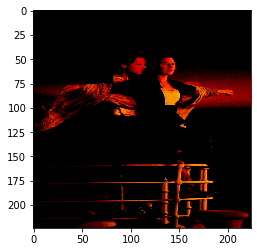

In [17]:
print(X_train[30])
plt.imshow(X_train[30])

plt.show()

### Get the predicted mask for a sample image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


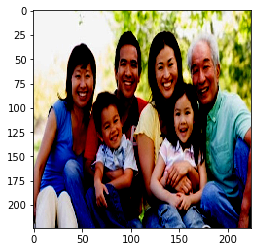

In [18]:
n = 4
sample_image = X_train[n]
sample_image = cv2.resize(sample_image, (IMAGE_WIDTH, IMAGE_HEIGHT))
plt.imshow(sample_image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


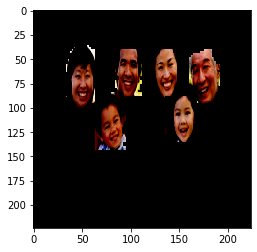

In [19]:
image_scaled = cv2.resize(sample_image, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
#image_scaled = preprocess_input(np.array(image_scaled, dtype=np.float32))
plt.imshow(image_scaled)
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([image_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))
masked_image = image_scaled
masked_image[:,:,0] = pred_mask*image_scaled[:,:,0]
masked_image[:,:,1] = pred_mask*image_scaled[:,:,1]
masked_image[:,:,2] = pred_mask*image_scaled[:,:,2]
plt.imshow(masked_image)

plt.show()

In [20]:
pred = model.predict(x=np.array([image_scaled]))[0]
pred.max()

1.0

### Impose the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

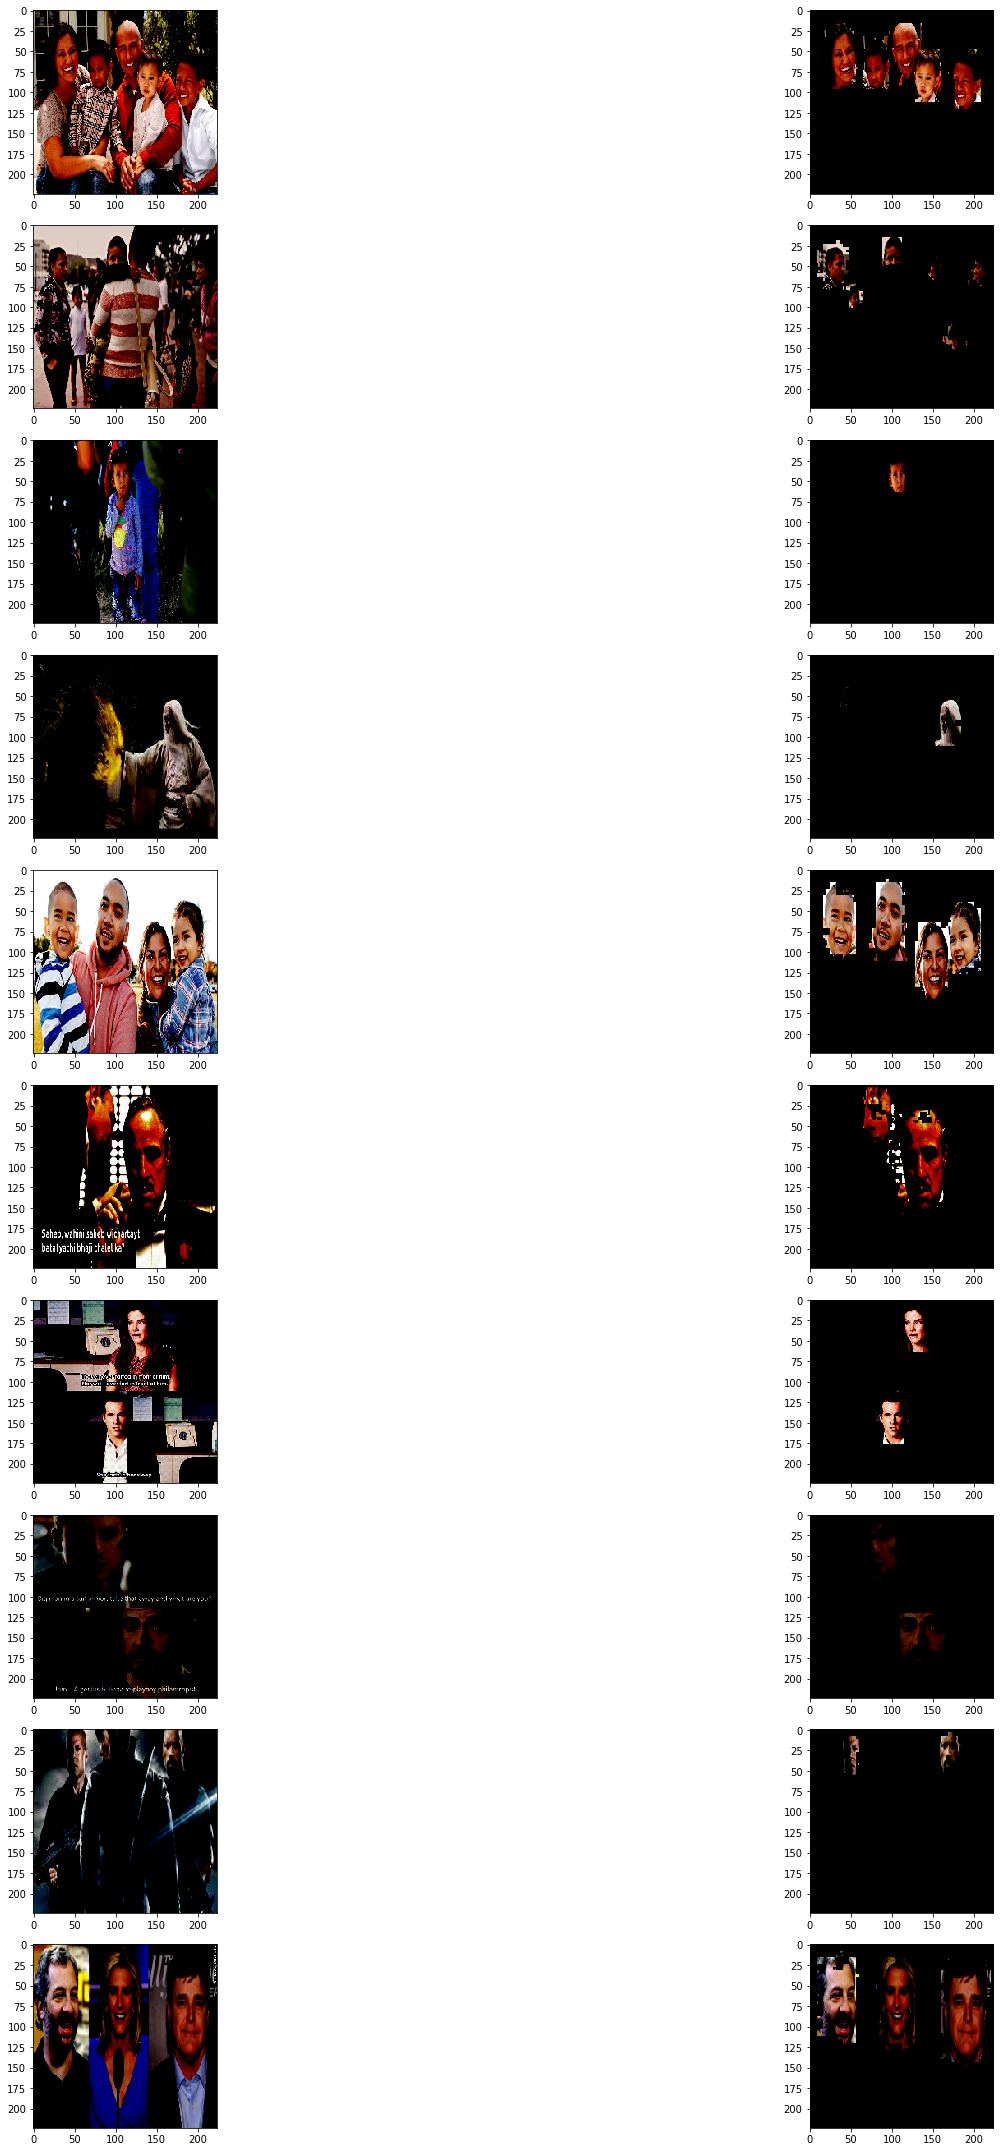

In [24]:
import random
r = list(range(150))
random.shuffle(r)
fig, ax = plt.subplots(10,2, figsize=(30,30))
counter = 0
for i in r[0:10]:
    sample_image = X_train[i]
    sample_image = cv2.resize(sample_image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    ax[counter,0].imshow(sample_image, )
    image_scaled = cv2.resize(sample_image, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    pred_mask = cv2.resize(1.0*(model.predict(x=np.array([image_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))
    masked_image = image_scaled
    masked_image[:,:,0] = pred_mask*image_scaled[:,:,0]
    masked_image[:,:,1] = pred_mask*image_scaled[:,:,1]
    masked_image[:,:,2] = pred_mask*image_scaled[:,:,2]
    ax[counter,1].imshow(masked_image)
    counter+=1
    
plt.tight_layout()
plt.show()